##Overview
SyriaTel Customer ChurnLinks to an external site.

Build a classifier to predict whether a customer will ("soon") stop doing business with SyriaTel, a telecommunications company. This is a binary classification problem.

Most naturally, your audience here would be the telecom business itself, interested in reducing how much money is lost because of customers who don't stick around very long. The question you can ask is: are there any predictable patterns here?


##Understanding the Business Problem
Goal: To predict if a customer will churn (stop doing business) — binary classification (Yes/No or 1/0).

Understand what churn means in SyriaTel's context (e.g., non-renewal, no activity for a period).

Identify the target variable (usually something like Churn or Exited).

Importing all essential libraries that I will likely need for building a churn prediction classifier (binary classification) using the SyriaTel dataset.

In [16]:
# Basic data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# For feature selection (optional but useful)
from sklearn.feature_selection import SelectKBest, chi2

# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
#from xgboost import XGBClassifier  # Ensure xgboost is installed

# Model evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

# Warnings
import warnings
warnings.filterwarnings('ignore')

##Loading the dataset

In [17]:
import pandas as pd

df = pd.read_csv("SyriaTel.csv")


##Initial Inspection of the Dataset

Checking data types, missing values, column names.

Getting a feel for what each feature represents.

In [18]:
df.head()
df.info()
df.describe()
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

(3333, 21)

##Missing Values & Duplicates

This enables me to handle missing values: Impute or drop.

Also, to remove duplicates if any.

In [19]:
df.isnull().sum()
df.duplicated().sum()


np.int64(0)

##Target Variable Distribution

Understand class balance.

If imbalanced, note it for later (e.g., use SMOTE or class weighting). This is due to the fact that most classification algorithms assume that the classes are balanced. If not, they tend to:

Favor the majority class (non-churners).

Show high accuracy, but miss the minority class (actual churners).

Make poor predictions for the very thing you're trying to detect.

<Axes: title={'center': 'Churn Distribution'}, xlabel='churn'>

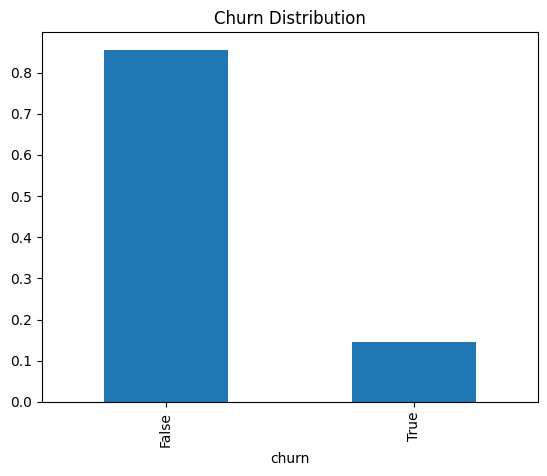

In [20]:
df['churn'].value_counts(normalize=True).plot(kind='bar', title='Churn Distribution')



##Splitting data

In [21]:
from sklearn.model_selection import train_test_split

# Drop the target column from the features
X = df.drop('churn', axis=1)

# Target variable
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,       # 20% for testing
    random_state=42,     # Ensures reproducibility
                       
)


From the observation, we can clearly see that the dataset is imbalanced. 

I will therefore employ the SMOTE technique:

SMOTE (Synthetic Minority Oversampling Technique)
SMOTE generates new synthetic examples of the minority class (churners) by interpolating between existing ones.

I use it to balance the training dataset.

In [22]:
# Drop non-numeric columns that are not useful for modeling
X_train_processed = X_train.drop(['state', 'phone number'], axis=1)

# Convert categorical columns to numeric using one-hot encoding
X_train_processed = pd.get_dummies(X_train_processed, columns=['international plan', 'voice mail plan'], drop_first=True)

# Apply SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

Categorical vs Numerical features 

Identify which columns are categorical

In [23]:
categorical = df.select_dtypes(include=['object']).columns
numerical = df.select_dtypes(include=['int64', 'float64']).columns


Univariate Analysis

array([[<Axes: title={'center': 'account length'}>,
        <Axes: title={'center': 'area code'}>,
        <Axes: title={'center': 'number vmail messages'}>,
        <Axes: title={'center': 'total day minutes'}>],
       [<Axes: title={'center': 'total day calls'}>,
        <Axes: title={'center': 'total day charge'}>,
        <Axes: title={'center': 'total eve minutes'}>,
        <Axes: title={'center': 'total eve calls'}>],
       [<Axes: title={'center': 'total eve charge'}>,
        <Axes: title={'center': 'total night minutes'}>,
        <Axes: title={'center': 'total night calls'}>,
        <Axes: title={'center': 'total night charge'}>],
       [<Axes: title={'center': 'total intl minutes'}>,
        <Axes: title={'center': 'total intl calls'}>,
        <Axes: title={'center': 'total intl charge'}>,
        <Axes: title={'center': 'customer service calls'}>]], dtype=object)

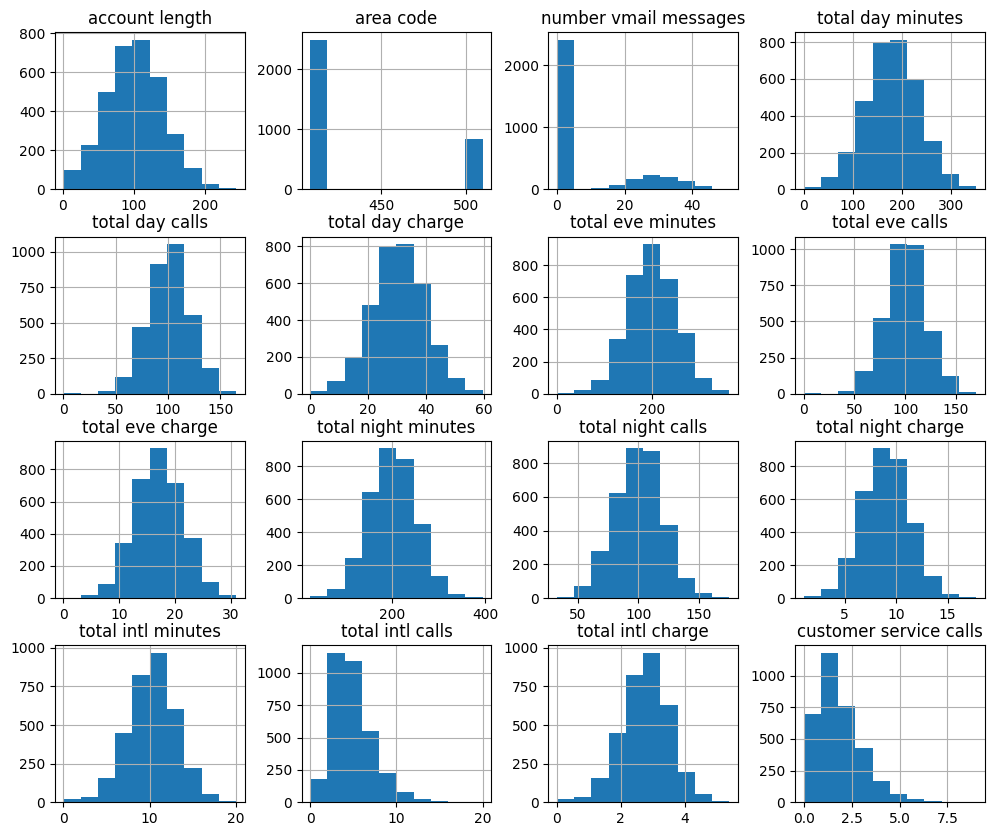

In [ ]:
#Numerical features
df[numerical].hist(figsize=(12, 10))


Catergorical features

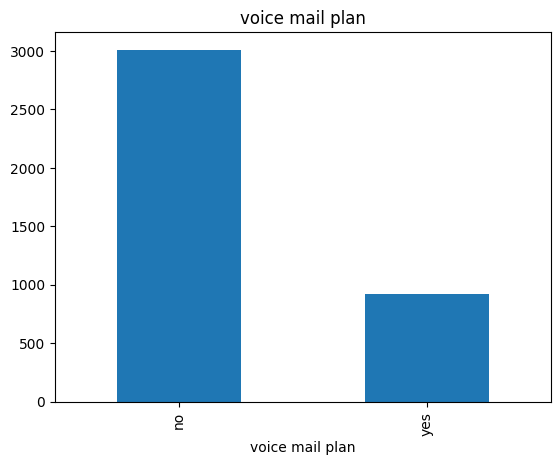

In [25]:
for col in categorical:
    df[col].value_counts().plot(kind='bar', title=col)


Bivariate Analysis with Target (Churn)

How features relate to churn:

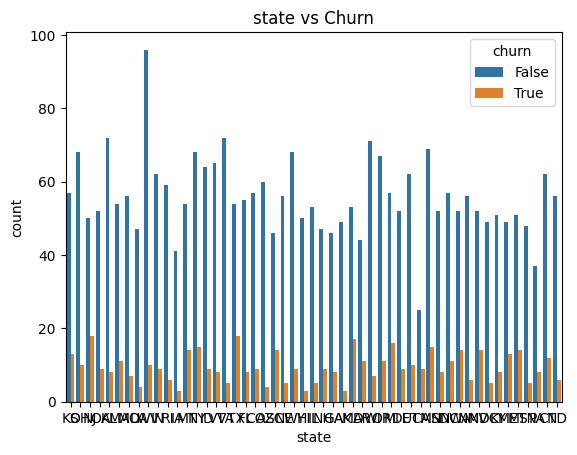

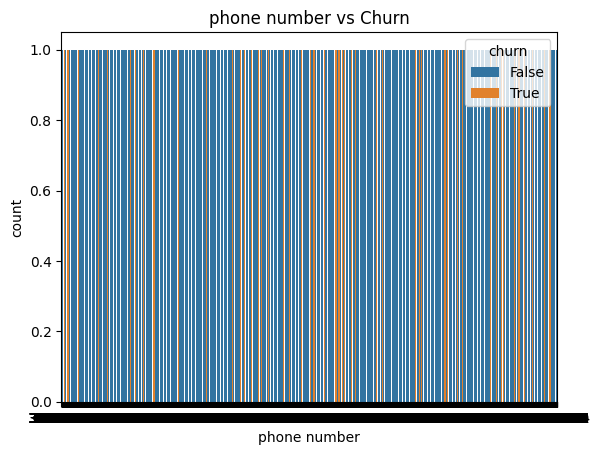

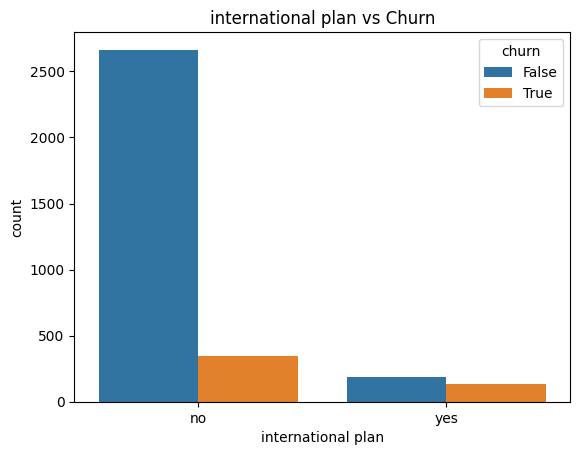

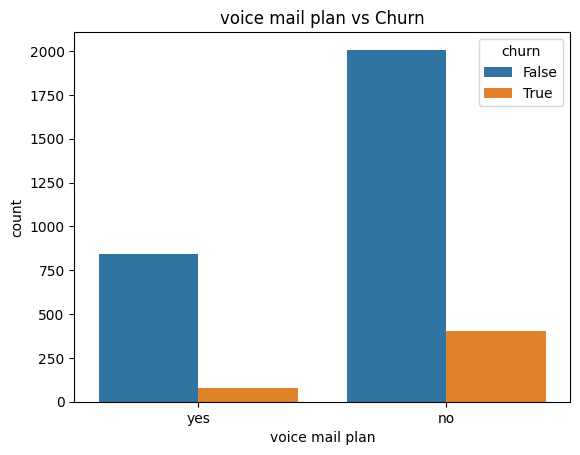

In [27]:
import seaborn as sns

for col in categorical:
    sns.countplot(data=df, x=col, hue='churn')
    plt.title(f'{col} vs Churn')
    plt.show()


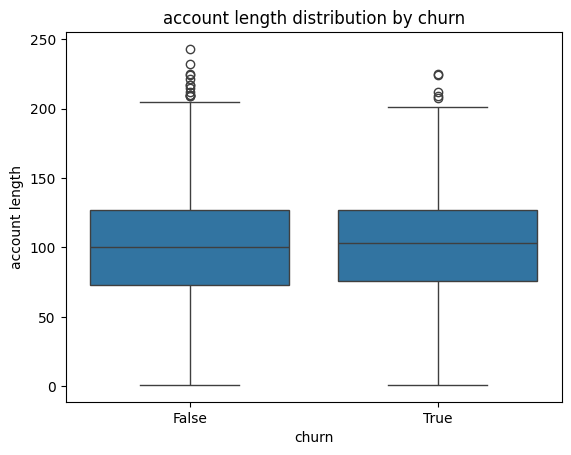

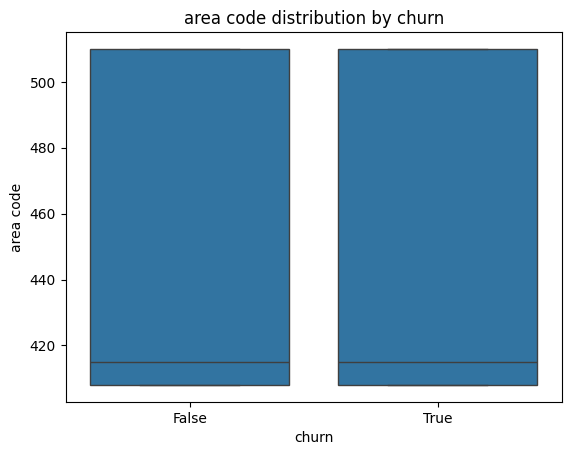

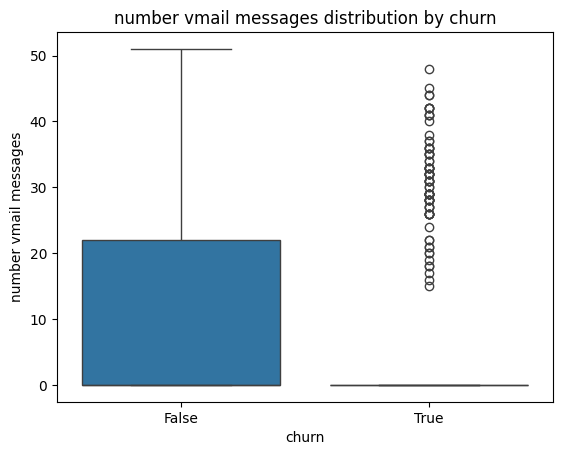

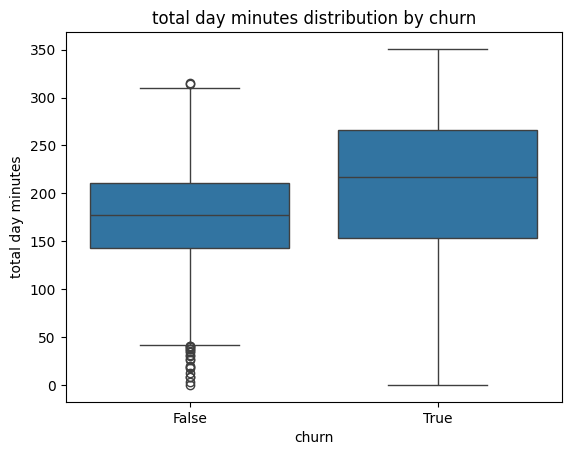

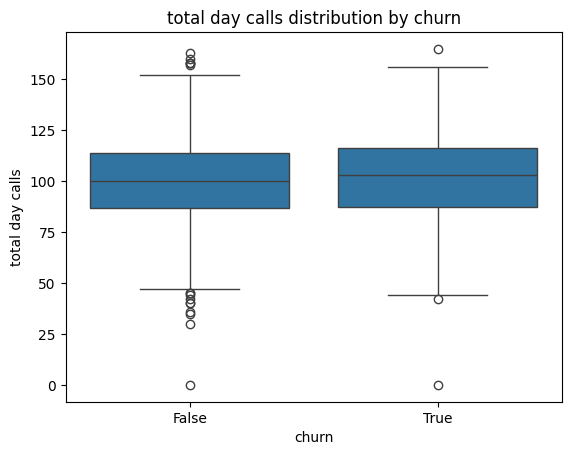

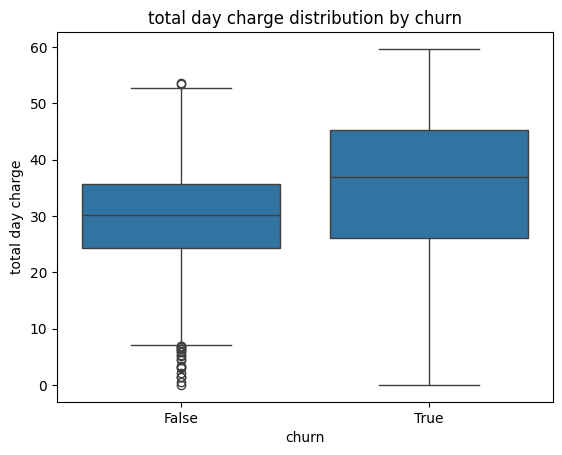

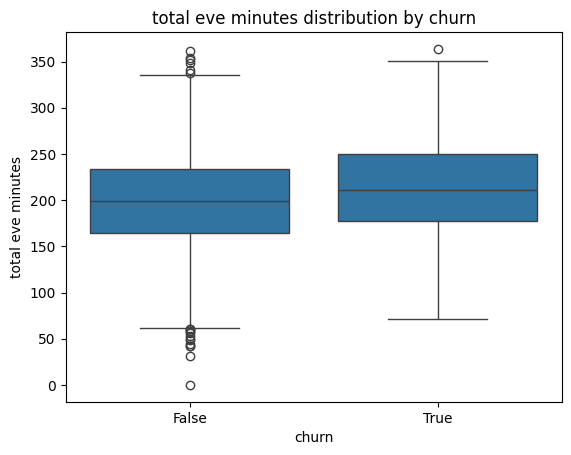

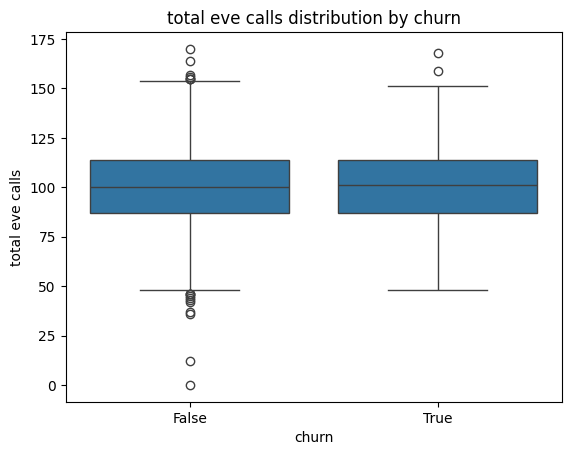

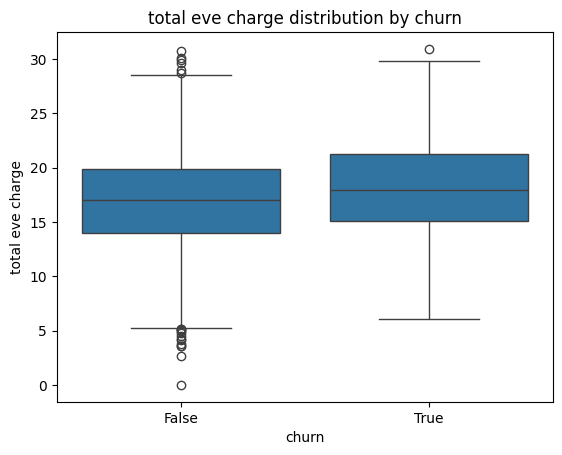

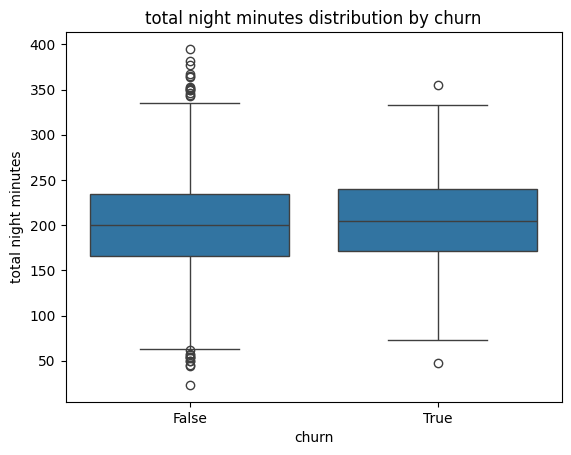

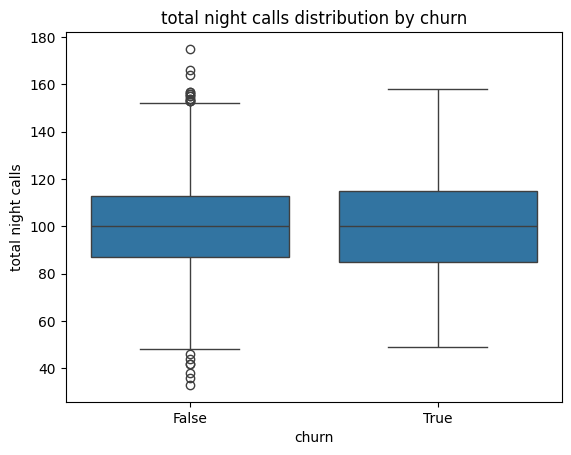

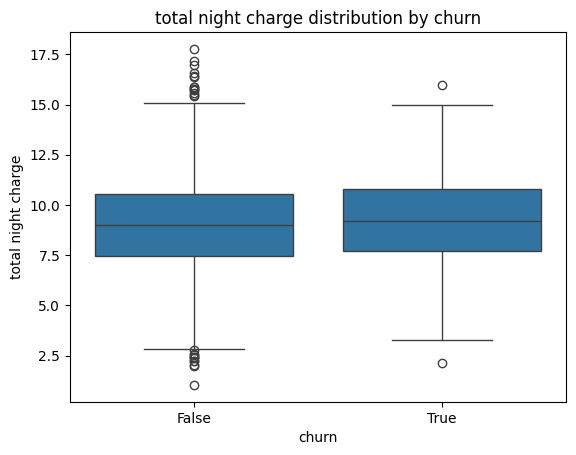

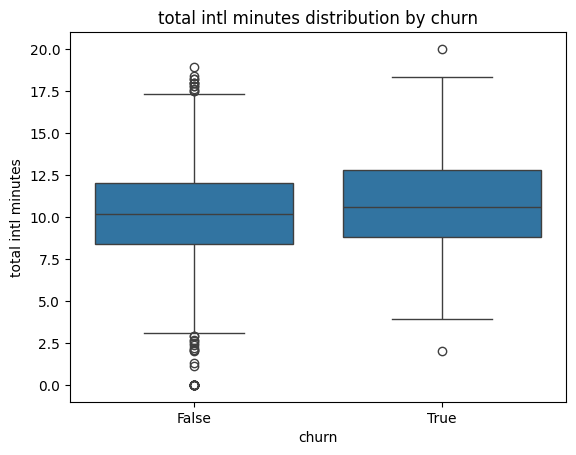

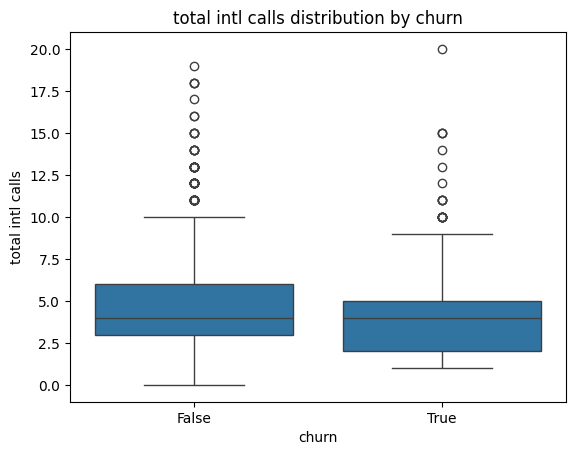

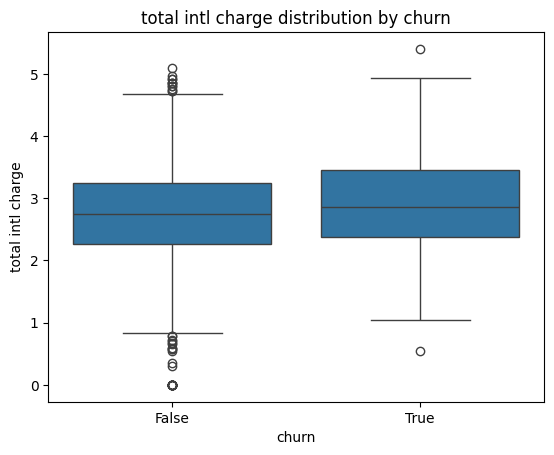

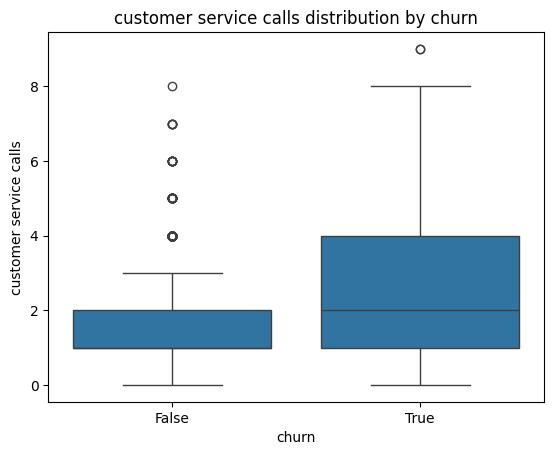

In [29]:
for col in numerical:
    sns.boxplot(data=df, x='churn', y=col)
    plt.title(f'{col} distribution by churn')
    plt.show()

Correlation Analysis

This enables me to:
Identify highly correlated variables (multicollinearity).

Explore relation with Churn.

Text(0.5, 1.0, 'Correlation Matrix')

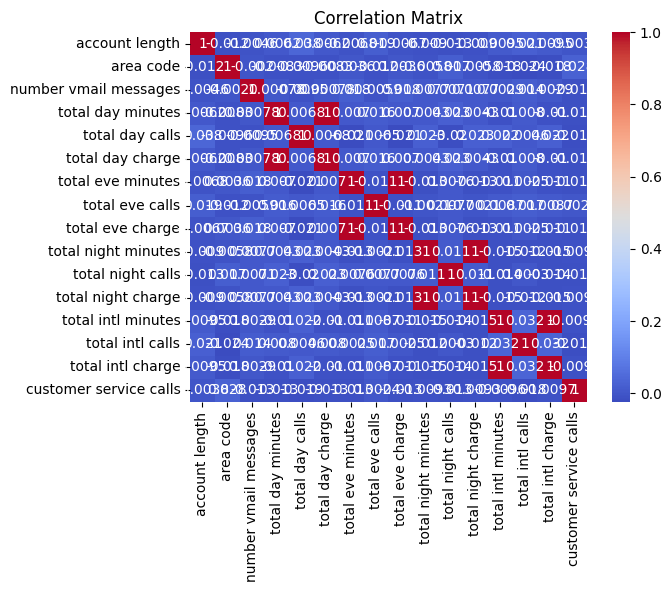

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df[numerical].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
